# Feature analysis for King County sale prices, Pavel Narnov   
#### This is modified work for peers from Data Analysis course from IBM Data Science specialization
The dataset for the current lab contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### Plan of data exploration:
0. Importing of libraries and dataset
1. Data Cleaning
2. Date formatting
3. EDA
4. Hypothesis testing
5. Feature analysis with Linear Lasso regressions
6. Conclusions

Firstly we are importing all necessary libraries and our dataset: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [4]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1. Data Cleaning

Lets drop "unnamed" column and perform some EDA:

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We see that we don't have any misleading column names now.
Lets perform some EDA.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We see that we have 'id' parameter which may be dropped and we have 2 variables with Null values (bedrooms and bathrooms) lets analize them before performing any actions:

In [8]:
df.drop('id', axis = 1, inplace = True)

In [9]:
df.bedrooms.value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

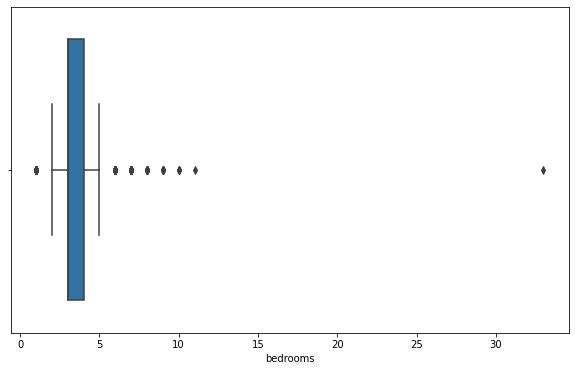

In [10]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.bedrooms)
plt.show()

Value analysis and the boxplot shows us all the values greater then 5 are outliers, due to the fact that we have so many outliers with so high varience it is better to replace Null values for bedrooms with the median value.

In [11]:
print('Rounded mean value for number of bedrooms in house:', round(df.bedrooms.mean(),1))
print('Median value for number of bedrooms in house:', df.bedrooms.median())

Rounded mean value for number of bedrooms in house: 3.4
Median value for number of bedrooms in house: 3.0


Comparing of mean and median parameters for bedrooms doesn't show a huge difference but we should understand that we are unnable to have a flat with 3.4 bedrooms so we choose median value for this variable.

In [12]:
med_bed = df.bedrooms.median()
df['bedrooms'].replace(np.nan, med_bed, inplace = True)
df.bedrooms.isnull().sum()

0

In [13]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75,  nan, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [14]:
df.bathrooms.describe()

count    21603.000000
mean         2.115736
std          0.768996
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

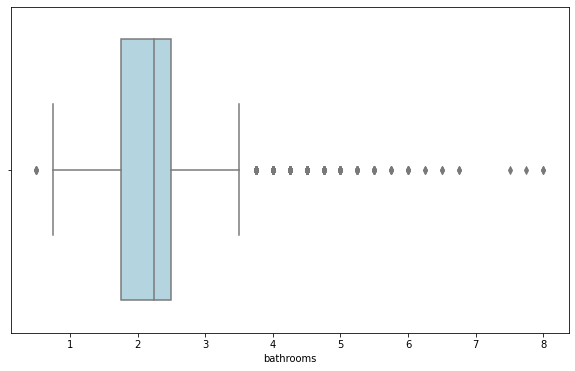

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.bathrooms, color = 'lightblue')
plt.show()

In [16]:
print('Mean value for number of bathrooms in house:', round(df.bathrooms.mean(),2))
print('Median value for number of bathrooms in house:', df.bathrooms.median())

Mean value for number of bathrooms in house: 2.12
Median value for number of bathrooms in house: 2.25


Here we also will use median value for bathrooms

In [17]:
med_bath = df.bathrooms.median()
df['bathrooms'].replace(np.nan, med_bath, inplace = True)
df.bathrooms.isnull().sum()

0

Final checking of null values:

In [18]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

So we don't have null values after replacing.
Lets go futher

### 2. Date formatting:

We have our date in improper format. Lets transform it and receive additional columns: year, month, day of month, day of week

In [19]:
df.date.head(10)

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
5    20140512T000000
6    20140627T000000
7    20150115T000000
8    20150415T000000
9    20150312T000000
Name: date, dtype: object

We see that we have improper date format for data analysis. Lets fix it!

In [20]:
df['date'] = pd.to_datetime(df['date'], yearfirst = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Extracting the year value:

In [21]:
df['year'] = pd.to_datetime(df['date'], yearfirst = True).dt.year
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


Extracting the month value:

In [22]:
df['month'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.month
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [23]:
df.month.max()

12

Max value for the month column is 12 so we have detected the format of date correctly

Extracting the day of month and day of week:

In [24]:
df['day_of_month'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.day
df['day_of_week'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.day_name()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_of_month,day_of_week
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday


Lets check our dataframe after formatting:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  float64       
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [26]:
df.to_csv('King_county_dataset.csv')

### 3. EDA

#### Analysis of prices distribution and correlations

Firstly lets check distribution of prices for all dataset using distplot and boxplot. After that we will be able to make some conclusions.

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


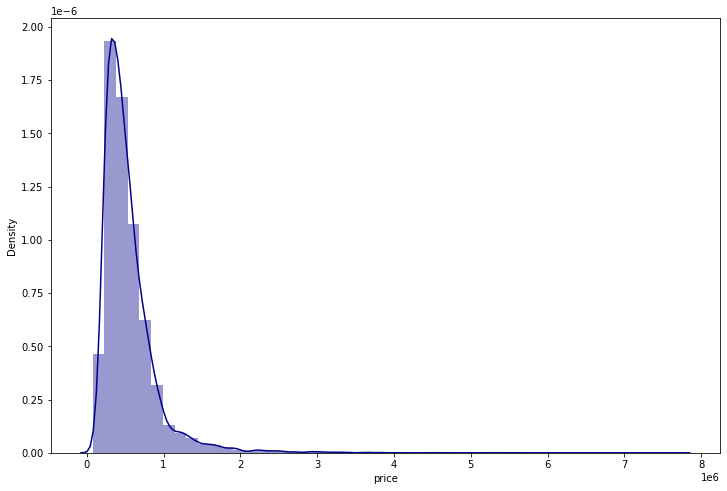

In [27]:
plt.figure(figsize = (12,8))
sns.distplot(df.price, color = 'darkblue')
plt.show()

In [28]:
df.price.skew()

4.024069144684712

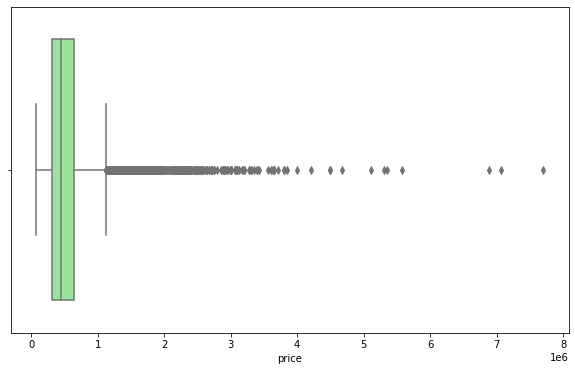

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df.price, color = 'lightgreen')
plt.show()

We see that our price data is right-skewed. We know that it is normal for datasets with house prices. 

Lets analyze our outliers:

In [30]:
from scipy.stats import zscore
df['Z_price'] = zscore(df['price'])
round((df[['price', 'Z_price']]).describe(),2)

,price,Z_price
count,21613.00,21613.00
mean,540088.14,-0.00
std,367127.20,1.00
min,75000.00,-1.27
25%,321950.00,-0.59
50%,450000.00,-0.25
75%,645000.00,0.29
max,7700000.00,19.50


In [31]:
df_out = df[df['Z_price'] > 3]
df_out[['price', 'Z_price']]

,price,Z_price
21,2000000.0,3.976675
153,2250000.0,4.657654
246,2400000.0,5.066241
269,2900000.0,6.428198
282,2050000.0,4.112871
...,...,...
21514,1865000.0,3.608947
21530,3000000.0,6.700590
21540,1881580.0,3.654109
21568,1700000.0,3.159501


We have 406 prices outliers where prices are higher than mean value + 3 std deviations for 21613 records

Lets get correlation info and pairplots for our whole datasets and get some insights from them:

Correlation analysis for our dataset:

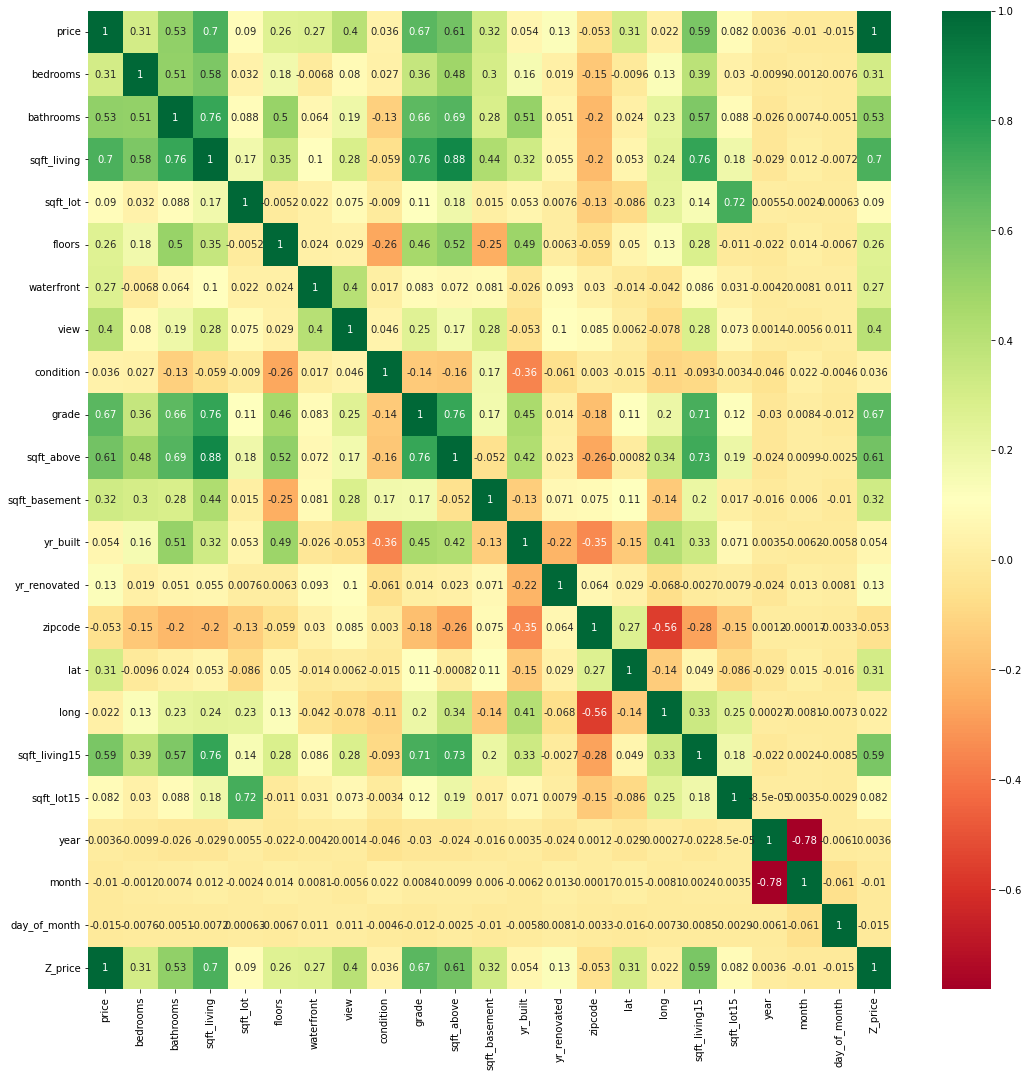

In [32]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [33]:
df.corr()['price'].sort_values(ascending = False)

Z_price          1.000000
price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525714
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
year             0.003576
month           -0.010081
day_of_month    -0.014670
zipcode         -0.053203
Name: price, dtype: float64

In [34]:
features = df.corr()['price'].sort_values(ascending = False)

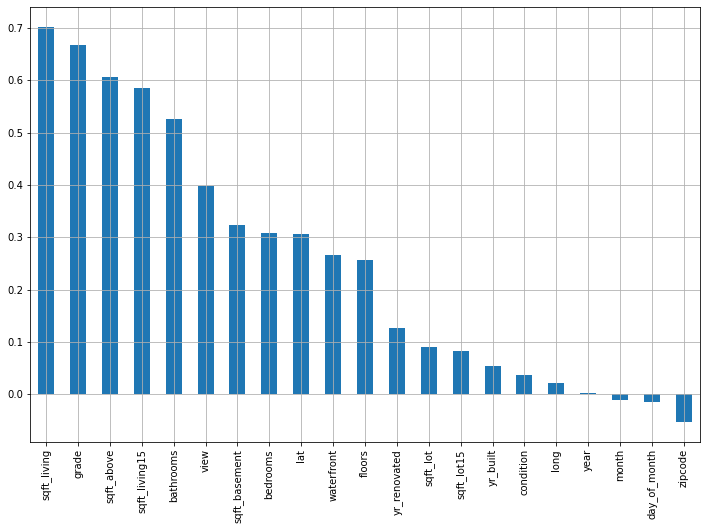

In [35]:
plt.figure(figsize = (12,8))
features[2:].plot(kind = 'bar')
plt.grid()
plt.show()

We can stay with df columns which have correlation coefficient > 0.1

In [36]:
new_df = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated', 'price']]
new_df.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,price
0,1180,7,1180,1340,1.00,0,0,3.0,47.5112,0,1.0,0,221900.0
1,2570,7,2170,1690,2.25,0,400,3.0,47.7210,0,2.0,1991,538000.0
2,770,6,770,2720,1.00,0,0,2.0,47.7379,0,1.0,0,180000.0
3,1960,7,1050,1360,3.00,0,910,4.0,47.5208,0,1.0,0,604000.0
4,1680,8,1680,1800,2.00,0,0,3.0,47.6168,0,1.0,0,510000.0


In [37]:
new_df.to_csv('cleaned_df.csv')

Lets draw pair plots:

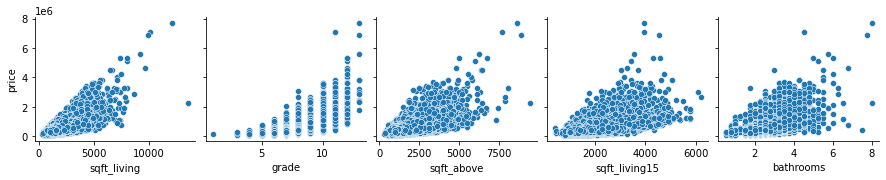

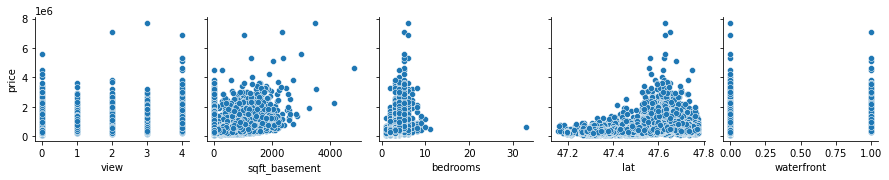

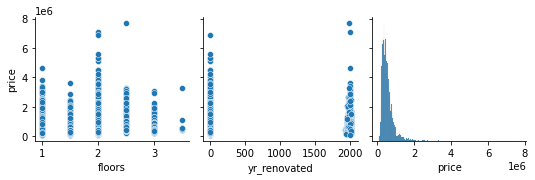

In [38]:
for i in range(0, len(new_df.columns), 5):
    sns.pairplot(data=new_df,
                x_vars=new_df.columns[i:i+5],
                y_vars=['price'])

### 4. Hypothesis testing

Lets perform a statistical analysis for waterfront parameter. Does it influence to our house prices?

In [39]:
print('Mean price grouped by waterfront parameter:')
print(new_df.groupby('waterfront')['price'].mean())
print('')
print('Median price grouped by waterfront parameter:')
print(new_df.groupby('waterfront')['price'].median())

Mean price grouped by waterfront parameter:
waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

Median price grouped by waterfront parameter:
waterfront
0     450000.0
1    1400000.0
Name: price, dtype: float64


1. Lets see how boxplot and distplot are looking: 

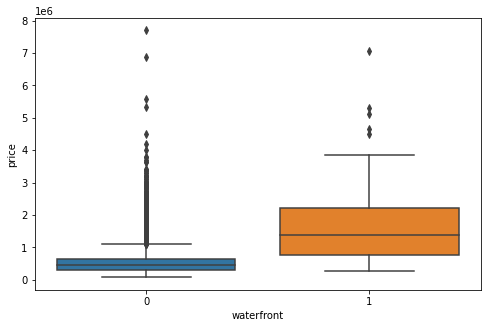

In [40]:
plt.figure(figsize = (8,5))
sns.boxplot(data = new_df, x = 'waterfront', y = 'price')
plt.show()

We see that quartile ranges of prices for houses with waterfront and without are different, but houses w/o waterfront view have much more outliers, lets check distribution in other way: 

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


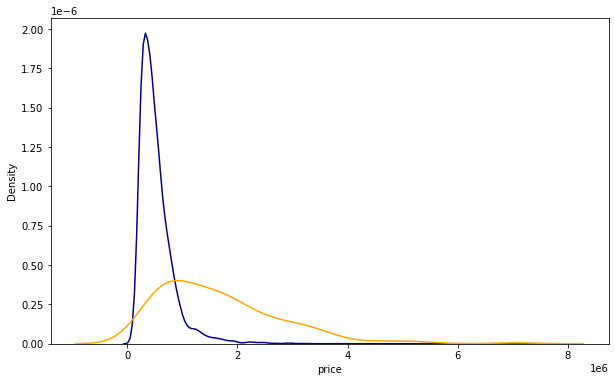

In [41]:
WoWF = new_df[new_df['waterfront'] == 0]
WF = new_df[new_df['waterfront'] == 1]
plt.figure(figsize = (10,6))
sns.distplot(WoWF.price, color = 'darkblue', hist = False)
sns.distplot(WF.price, color = 'orange', hist = False)
plt.show()

We see 2 different distribitions with Max density values near each other:   
Our Null hypothesis will be: There is no any correlation with waterfront and house price.   
Our Alt hypothesis will be: There is some correlation
Lets perform a statistical analysis:

Firstly we fix our distributions to be looking as normal for analysis:

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


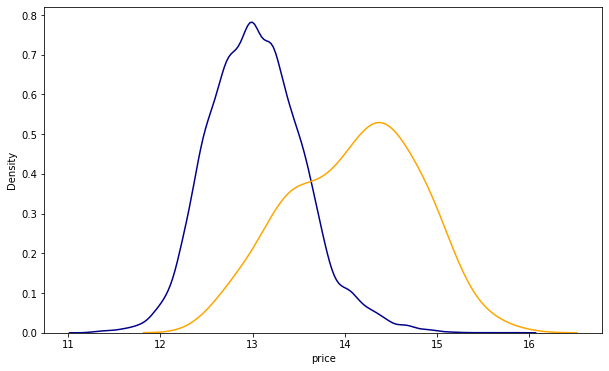

In [42]:
plt.figure(figsize = (10,6))
sns.distplot(np.log(WoWF.price), color = 'darkblue', hist = False)
sns.distplot(np.log(WF.price), color = 'orange', hist = False)
plt.show()

Now they look better and we can compare prices for different categories

In [43]:
import scipy.stats as stats 

In [44]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(np.log(WF.price), np.log(WoWF.price))
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  26.065687913630512 , p_value1 =  1.6959013227359578e-147


In [45]:
if p_value1 < alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no effect of waterfront on house prices.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is no effect of waterfront on house prices.")

Conclusion: since p_value 1.6959013227359578e-147 is less than alpha 0.05 
Reject the null hypothesis that there is no effect of waterfront on house prices.


So we can conclude that there is some effect of waterfront on house prices.

We have day of week parameter which we haven't analyzed yet:

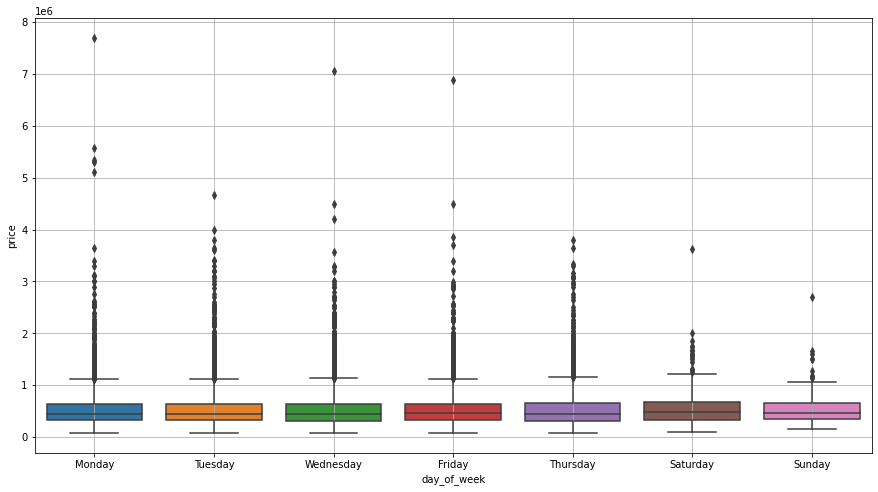

In [46]:
plt.figure(figsize = (15,8))
sns.boxplot(data = df, x = 'day_of_week', y = 'price')
plt.grid()
plt.show()

Boxplot looks like there is no effect of day of week on price.
Lets check it!

H0: There is no effect of day of week on price.   
H1: There is an effect

In [47]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [48]:
formula = 'price ~ C(day_of_week)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(day_of_week),6.0,6.046927e+11,1.007821e+11,0.747687,0.611198
Residual,21606.0,2.912312e+15,1.347918e+11,NaN,NaN


Our P value in this test is 0.61 and it is greater then 0.05 so we can't reject our null hypothesis for this survey 

### 5. Feature analysis with Machine learning techniques:

In [49]:
df.shape

(21613, 25)

It seems that 21613 records is very huge quantity of data for feature analysis. In case we analyze the whole dataset we will need to much time for modeling.    

In [50]:
data = df.sample(n = 5000, replace=False, random_state=10000)

In [51]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_of_month,day_of_week,Z_price
2083,2014-12-08,800000.0,4.0,2.5,2390,10000,1.0,0,0,3,...,98040,47.5801,-122.229,1900,9752,2014,12,8,Monday,0.707978
3120,2014-08-11,350000.0,3.0,1.5,1320,4400,1.0,0,0,3,...,98112,47.6231,-122.292,1350,4400,2014,8,11,Monday,-0.517784
9705,2014-05-12,751000.0,4.0,2.5,3110,6142,2.0,0,0,3,...,98052,47.7010,-122.111,3200,6826,2014,5,12,Monday,0.574506
13000,2014-11-04,295000.0,3.0,1.0,1380,7575,1.0,0,0,4,...,98056,47.5139,-122.187,1320,7600,2014,11,4,Tuesday,-0.667599
9783,2014-12-30,340000.0,3.0,2.0,1570,14992,1.0,0,0,3,...,98014,47.6965,-121.922,1640,15000,2014,12,30,Tuesday,-0.545023


In [52]:
data.shape

(5000, 25)

In [53]:
set(data.duplicated())

{False}

In [54]:
data.to_csv('Houses_5000ex.csv')

## Load the data for Reg analysis

In [3]:
data = pd.read_csv('Houses_5000ex.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_of_month,day_of_week,Z_price
0,2014-12-08,800000.0,4.0,2.5,2390,10000,1.0,0,0,3,...,98040,47.5801,-122.229,1900,9752,2014,12,8,Monday,0.707978
1,2014-08-11,350000.0,3.0,1.5,1320,4400,1.0,0,0,3,...,98112,47.6231,-122.292,1350,4400,2014,8,11,Monday,-0.517784
2,2014-05-12,751000.0,4.0,2.5,3110,6142,2.0,0,0,3,...,98052,47.7010,-122.111,3200,6826,2014,5,12,Monday,0.574506
3,2014-11-04,295000.0,3.0,1.0,1380,7575,1.0,0,0,4,...,98056,47.5139,-122.187,1320,7600,2014,11,4,Tuesday,-0.667599
4,2014-12-30,340000.0,3.0,2.0,1570,14992,1.0,0,0,3,...,98014,47.6965,-121.922,1640,15000,2014,12,30,Tuesday,-0.545023


We see that we don't have any duplicated data in our smaller dataset made for ML analysis.

In [4]:
X = data.copy()
X.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day_of_month,day_of_week,Z_price
0,2014-12-08,800000.0,4.0,2.5,2390,10000,1.0,0,0,3,...,98040,47.5801,-122.229,1900,9752,2014,12,8,Monday,0.707978
1,2014-08-11,350000.0,3.0,1.5,1320,4400,1.0,0,0,3,...,98112,47.6231,-122.292,1350,4400,2014,8,11,Monday,-0.517784
2,2014-05-12,751000.0,4.0,2.5,3110,6142,2.0,0,0,3,...,98052,47.7010,-122.111,3200,6826,2014,5,12,Monday,0.574506
3,2014-11-04,295000.0,3.0,1.0,1380,7575,1.0,0,0,4,...,98056,47.5139,-122.187,1320,7600,2014,11,4,Tuesday,-0.667599
4,2014-12-30,340000.0,3.0,2.0,1570,14992,1.0,0,0,3,...,98014,47.6965,-121.922,1640,15000,2014,12,30,Tuesday,-0.545023


In [5]:
X = X.drop('date', axis = 1)
X = X.drop('price', axis = 1)
X = X.drop('Z_price', axis = 1)
X = X.drop('zipcode', axis = 1)
X = X.drop('day_of_week', axis = 1)
X = X.drop('sqft_living15', axis = 1)
X = X.drop('sqft_lot15', axis = 1)
X = X.drop('year', axis = 1)
y = data['price']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,month,day_of_month
0,4.0,2.5,2390,10000,1.0,0,0,3,9,1590,800,1975,0,47.5801,-122.229,12,8
1,3.0,1.5,1320,4400,1.0,0,0,3,6,1320,0,1909,0,47.6231,-122.292,8,11
2,4.0,2.5,3110,6142,2.0,0,0,3,9,3110,0,2004,0,47.7010,-122.111,5,12
3,3.0,1.0,1380,7575,1.0,0,0,4,7,1380,0,1963,0,47.5139,-122.187,11,4
4,3.0,2.0,1570,14992,1.0,0,0,3,8,1570,0,2001,0,47.6965,-121.922,12,30


In [6]:
print('Shape of X:', X.shape)
print('Shape of y', y.shape)

Shape of X: (5000, 17)
Shape of y (5000,)


Now we are ready to perform simple linear regression analysis for our data.

To perform feature analysis we may not divide our dataset for train and test data, we can fit the entire datasert and check the results.

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       5000 non-null   float64
 1   bathrooms      5000 non-null   float64
 2   sqft_living    5000 non-null   int64  
 3   sqft_lot       5000 non-null   int64  
 4   floors         5000 non-null   float64
 5   waterfront     5000 non-null   int64  
 6   view           5000 non-null   int64  
 7   condition      5000 non-null   int64  
 8   grade          5000 non-null   int64  
 9   sqft_above     5000 non-null   int64  
 10  sqft_basement  5000 non-null   int64  
 11  yr_built       5000 non-null   int64  
 12  yr_renovated   5000 non-null   int64  
 13  lat            5000 non-null   float64
 14  long           5000 non-null   float64
 15  month          5000 non-null   int64  
 16  day_of_month   5000 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 664.2 KB


In [8]:
y.info

<bound method Series.info of 0        800000.0
1        350000.0
2        751000.0
3        295000.0
4        340000.0
          ...    
4995     250000.0
4996     420000.0
4997     334990.0
4998    1862000.0
4999     269950.0
Name: price, Length: 5000, dtype: float64>

We don't have object or null variables so we are able to train the model.

Lets transform our variables for proper training results:

In [9]:
X_minmax = MinMaxScaler().fit_transform(X)
y_sqrt = np.sqrt(y)

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


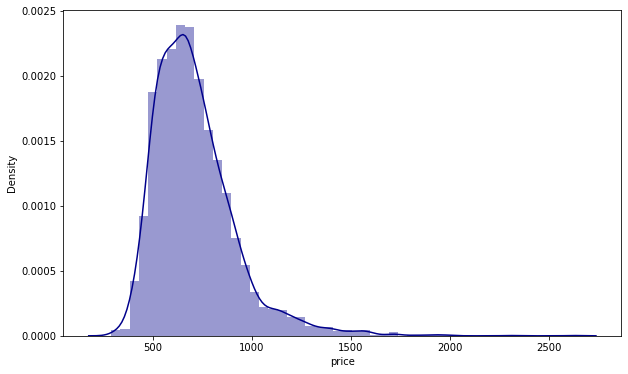

In [10]:
plt.figure(figsize = (10,6))
sns.distplot(y_sqrt, color = 'darkblue')
plt.show()

In [11]:
LR = LinearRegression()
LR = LR.fit(X_minmax, y_sqrt)
y_pred = LR.predict(X_minmax)
score = r2_score(y, y_pred**2)
print(score)

0.750654365545991


In [12]:
LR.coef_

array([-116.85496472,  212.95566483,  396.33918276,   44.82996332,
         24.31488271,  189.30849591,  130.7564113 ,   89.8465055 ,
        618.6269517 ,  493.67684577,  183.61043062, -159.85870722,
         25.44988798,  277.98512689,  -18.37846085,  -15.52958343,
         -4.41775438])

We see that Linear regression for sqrt transformed y variable gives us high r2 score results which are sutable for futher analysis.

In [13]:
coef_vals = pd.DataFrame(zip(X.columns.values, LR.coef_))
coef_vals.sort_values(by = 1)

,0,1
11,yr_built,-159.858707
0,bedrooms,-116.854965
14,long,-18.378461
15,month,-15.529583
16,day_of_month,-4.417754
4,floors,24.314883
12,yr_renovated,25.449888
3,sqft_lot,44.829963
7,condition,89.846506
6,view,130.756411


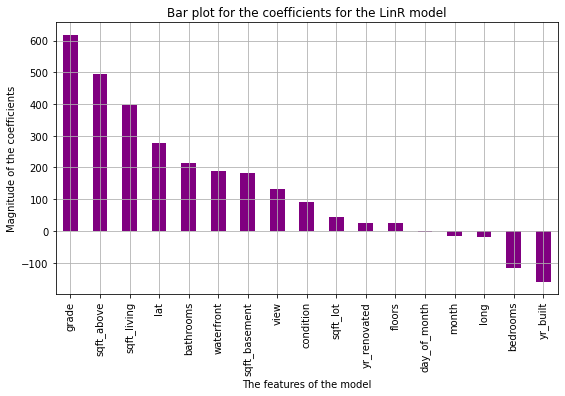

In [14]:
coef_vals.set_index(0, inplace = True)

plt.figure(figsize = (9,5))
coef_vals[1].sort_values(ascending = False).plot(kind = 'bar', color = 'purple')
plt.title('Bar plot for the coefficients for the LinR model')
plt.ylabel('Magnitude of the coefficients')
plt.xlabel('The features of the model')
plt.grid()
plt.show()

### RFE method to find N best parameters for Linear Regression!

In [15]:
from sklearn.feature_selection import RFE
rfe_mod = RFE(LR, n_features_to_select = 1, importance_getter = 'auto')
rfe_mod = rfe_mod.fit(X_minmax, y_sqrt)
y_hat = rfe_mod.predict(X_minmax)

Method which is described below is the method to get several (10) features with the highest influence on our target variable. 
We need to compare these attributes with correlation barplot.

In [16]:
print(rfe_mod.get_feature_names_out(input_features = X.columns.values))

['sqft_living']


In [17]:
r2_score(y, y_hat**2)

0.5065911775324223

In [18]:
rfe_mod.ranking_

array([10,  7,  1, 12, 13,  5,  9, 11,  4,  2,  3,  8, 14,  6, 15, 16, 17])

In [19]:
coef_rank = pd.DataFrame(zip(X.columns.values, rfe_mod.ranking_))
coef_rank.sort_values(by = 1)

,0,1
2,sqft_living,1
9,sqft_above,2
10,sqft_basement,3
8,grade,4
5,waterfront,5
13,lat,6
1,bathrooms,7
11,yr_built,8
6,view,9
0,bedrooms,10


In [20]:
len(X.columns)

17

In [21]:
scores = {}
for i in range(len(X.columns)):
    rfe_mod = RFE(LR, n_features_to_select = i+1)
    rfe_mod = rfe_mod.fit(X_minmax, y_sqrt)
    y_hat = rfe_mod.predict(X_minmax)
    scores[i+1] = (r2_score(y, y_hat**2))
    
scores

{1: 0.5065911775324223,
 2: 0.5064145476467575,
 3: 0.505644276941646,
 4: 0.5840024524218367,
 5: 0.6202490098971751,
 6: 0.6882776510630249,
 7: 0.6889034991470262,
 8: 0.7333946439153439,
 9: 0.7451113535193258,
 10: 0.7470935708477076,
 11: 0.7505953983099597,
 12: 0.7501591660307227,
 13: 0.7493968120118994,
 14: 0.7499584605345038,
 15: 0.750342360847142,
 16: 0.7505800754365719,
 17: 0.750654365545991}

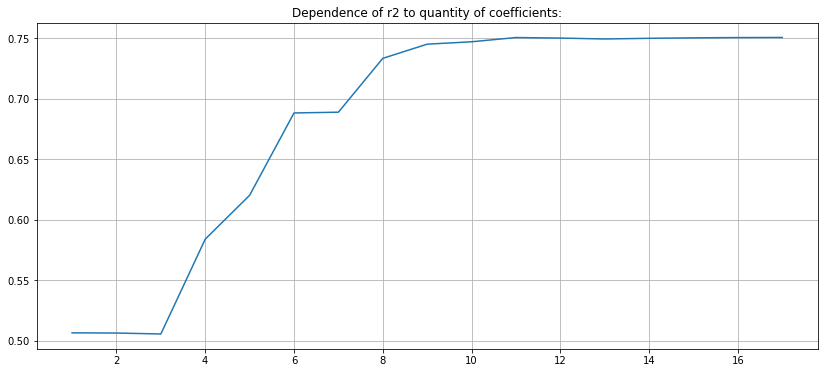

In [22]:
plt.figure(figsize = (14,6))
fig = sns.lineplot(x = scores.keys(), y = scores.values())
plt.title('Dependence of r2 to quantity of coefficients:')
plt.grid()
plt.show()

Line plot analysis shows us that 11 variables are enough for Linear Regression moddeling. We have R2 score = 0.75 having only 11 features from our dataset. It is better to cut quantity of features to avoid model overfiiting.
We also see that sqft_above and sqft_basement are the 2nd and the 3rd essential variables but they do not improve r2 results due to these variables are strongly correlated with sqf_living. Lets remove these two variables for futher analysis.

For our Lasso analysis we may leave 10 most important variables. I suppose it's good idea to reject sqft_living15 and sqft_lot15 beacose these variables seem to be the duplicates of sqft_living and sqft_lot.

It is possible to choose variables for simplified analysis using RFE method. RFE method for Liear Regression shows that some results of influencive variables are different in comparison with the results of correlation analysis. I suppose this this difference may be connected to scaling of the data. RFE method should give us more accureate results.

In [23]:
from sklearn.feature_selection import RFE
rfe_mod = RFE(LR, n_features_to_select = 11)
rfe_mod = rfe_mod.fit(X_minmax, y_sqrt)
y_hat = rfe_mod.predict(X_minmax)
print(rfe_mod.get_feature_names_out(input_features = X.columns.values))

['bedrooms' 'bathrooms' 'sqft_living' 'waterfront' 'view' 'condition'
 'grade' 'sqft_above' 'sqft_basement' 'yr_built' 'lat']


In [102]:
data.shape

(5000, 25)

In [24]:
data1 = data[['bedrooms','bathrooms','sqft_living', 'waterfront', 'view', 'condition',
             'grade', 'yr_built', 'lat', 'price']]
data1.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,yr_built,lat,price
0,4.0,2.5,2390,0,0,3,9,1975,47.5801,800000.0
1,3.0,1.5,1320,0,0,3,6,1909,47.6231,350000.0
2,4.0,2.5,3110,0,0,3,9,2004,47.7010,751000.0
3,3.0,1.0,1380,0,0,4,7,1963,47.5139,295000.0
4,3.0,2.0,1570,0,0,3,8,2001,47.6965,340000.0


In [25]:
data1.shape

(5000, 10)

In [26]:
data1.to_csv('Houses_CLEANED.csv')

### Lasso analysis.
Lets perform Lasso analysis for our most impacful variables.

Firstly it will be great to find the best hyperparameters using Grid Search CV.

In [27]:
data = pd.read_csv('Houses_CLEANED.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
print('Shape of the data:')
print(data.shape)
print(' ')
data.head()

Shape of the data:
(5000, 10)
 


,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,yr_built,lat,price
0,4.0,2.5,2390,0,0,3,9,1975,47.5801,800000.0
1,3.0,1.5,1320,0,0,3,6,1909,47.6231,350000.0
2,4.0,2.5,3110,0,0,3,9,2004,47.7010,751000.0
3,3.0,1.0,1380,0,0,4,7,1963,47.5139,295000.0
4,3.0,2.0,1570,0,0,3,8,2001,47.6965,340000.0


In [28]:
X = data.drop('price', axis = 1)
y = data['price']
print(X.shape, y.shape)

(5000, 9) (5000,)


In [29]:
X

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,yr_built,lat
0,4.0,2.50,2390,0,0,3,9,1975,47.5801
1,3.0,1.50,1320,0,0,3,6,1909,47.6231
2,4.0,2.50,3110,0,0,3,9,2004,47.7010
3,3.0,1.00,1380,0,0,4,7,1963,47.5139
4,3.0,2.00,1570,0,0,3,8,2001,47.6965
...,...,...,...,...,...,...,...,...,...
4995,3.0,2.00,1050,0,0,4,7,1953,47.3206
4996,2.0,1.00,960,0,0,3,7,1955,47.7642
4997,4.0,2.50,2220,0,0,3,8,2014,47.5014
4998,4.0,5.25,5240,0,2,3,10,2006,47.5605


In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Grid Search to find the best parameters for Lasso regression. I set interaction_only = False to try to get the best r2 result.

In [41]:
est = Pipeline([
    ('poly', PolynomialFeatures(interaction_only = False, include_bias = True)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(max_iter = 10000))
])
params = {'poly__degree':(2, 3, 4),
          'model__alpha':np.geomspace(1,1000, 4)
         }
grid = GridSearchCV(estimator = est, param_grid = params, cv = 5)
grid.fit(X, y)
print('Best params:', grid.best_params_)
print(' ')
print('Best score:', grid.best_score_)

Best params: {'model__alpha': 1000.0, 'poly__degree': 4}
 
Best score: 0.7355689529961632


In [42]:
y_hat = grid.best_estimator_.predict(X)
score = r2_score(y, y_hat)

In [43]:
score

0.7540124469891826

In [44]:
grid.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('scaler', MinMaxScaler()),
                ('model', Lasso(alpha=1000.0, max_iter=10000))])>

In [45]:
df_importances = pd.DataFrame(zip(grid.best_estimator_.named_steps["poly"].get_feature_names(input_features = X.columns),
                 grid.best_estimator_.named_steps["model"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'waterfront', 4: 'view', 5: 'condition', 6: 'grade', 7: 'yr_built', 8: 'lat'}
 


,0,1
8,yr_built,-2.044001e+05
682,condition^3 yr_built,-4.016389e+04
680,condition^4,-2.348135e+04
588,sqft_living lat^3,4.268914e+03
675,view grade lat^2,2.191165e+04
644,waterfront lat^3,5.265426e+04
610,waterfront view^3,5.306679e+04
645,view^4,1.446705e+05
664,view condition grade^2,1.821186e+05
570,sqft_living condition^2 grade,2.089117e+05


We have to complex parameters with very high coefficients. It seems that our model is going to be a black-box model.   
We also see that our r2 result is very close to the r2 result of Linear Regression. This fact is telling us about model overfitting as well.

Lets try to analyze more simple models and their results:

In [46]:
est1 = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, interaction_only = True)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(max_iter = 10000))
])
params1 = {'model__alpha':np.geomspace(1,100, 3)}
grid1 = GridSearchCV(estimator = est1, param_grid = params1, cv = 5)
grid1.fit(X, np.sqrt(y))
print('Best params:', grid1.best_params_)
print(' ')
print('Best score:', grid1.best_score_)
print(' ')
print('Results info:')
print(grid1.cv_results_)

Best params: {'model__alpha': 1.0}
 
Best score: 0.7591107117598368
 
Results info:
{'mean_fit_time': array([0.2591311 , 0.04997039, 0.02084193]), 'std_fit_time': array([0.03490503, 0.00622514, 0.00598929]), 'mean_score_time': array([0.00572524, 0.00559649, 0.00381179]), 'std_score_time': array([0.00595527, 0.00101856, 0.00230923]), 'param_model__alpha': masked_array(data=[1.0, 10.0, 100.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__alpha': 1.0}, {'model__alpha': 10.0}, {'model__alpha': 100.0}], 'split0_test_score': array([ 7.89346703e-01,  4.61228307e-01, -3.40640943e-04]), 'split1_test_score': array([ 7.55613967e-01,  4.96604669e-01, -5.51497128e-05]), 'split2_test_score': array([ 7.26608700e-01,  4.62396425e-01, -4.06923213e-05]), 'split3_test_score': array([ 7.68548346e-01,  4.86806256e-01, -4.65497457e-04]), 'split4_test_score': array([ 7.55435843e-01,  4.61916890e-01, -8.38936009e-06]), 'mean_test_score': array(

In [47]:
y_hat2 = grid1.best_estimator_.predict(X)
r2_score(y, y_hat2**2)

0.7295962864630399

In [48]:
df_importances = pd.DataFrame(zip(grid1.best_estimator_.named_steps["poly"].get_feature_names(input_features = X.columns),
                 grid1.best_estimator_.named_steps["model"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'waterfront', 4: 'view', 5: 'condition', 6: 'grade', 7: 'yr_built', 8: 'lat'}
 


,0,1
8,yr_built,-111.096534
30,sqft_living lat,34.398338
39,view lat,47.341524
4,waterfront,78.498247
5,view,104.720704
9,lat,256.433450
22,bathrooms grade,295.222751
27,sqft_living condition,569.031568
44,grade lat,647.345303


We got only 9 not null parameters with sutable r2 results. It is good result for model interpretation task.

In [49]:
df_importances.set_index(0, inplace = True)
df_importances

,1
0,
waterfront,78.498247
view,104.720704
yr_built,-111.096534
lat,256.433450
bathrooms grade,295.222751
sqft_living condition,569.031568
sqft_living lat,34.398338
view lat,47.341524
grade lat,647.345303


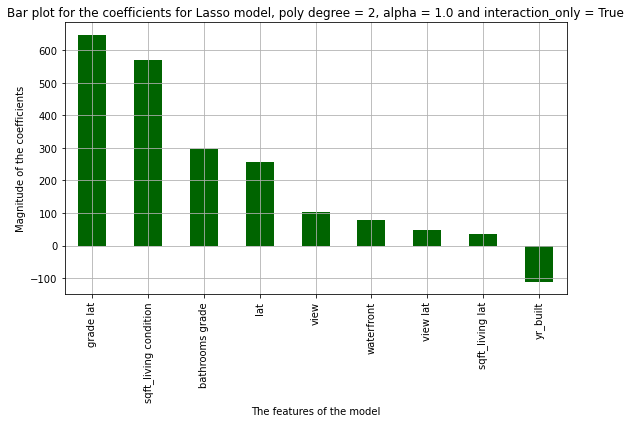

In [50]:
plt.figure(figsize = (9,5))
df_importances[1].sort_values(ascending = False).plot(kind = 'bar', color = 'darkgreen')
plt.title('Bar plot for the coefficients for Lasso model, poly degree = 2, alpha = 1.0 and interaction_only = True')
plt.ylabel('Magnitude of the coefficients')
plt.xlabel('The features of the model')
plt.grid()
plt.show()

The same model but interaction_only = False.

In [51]:
est1 = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, interaction_only = False)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(max_iter = 10000))
])
params1 = {'model__alpha':np.geomspace(1,100, 3)}
grid1 = GridSearchCV(estimator = est1, param_grid = params1, cv = 5)
grid1.fit(X, np.sqrt(y))
print('Best params:', grid1.best_params_)
print(' ')
print('Best score:', grid1.best_score_)
print(' ')
print('Results info:')
print(grid1.cv_results_)

Best params: {'model__alpha': 1.0}
 
Best score: 0.7617721866597403
 
Results info:
{'mean_fit_time': array([0.09162316, 0.188936  , 0.01562471]), 'std_fit_time': array([1.42030368e-02, 2.15118402e-01, 3.16082257e-06]), 'mean_score_time': array([0.00099974, 0.00139976, 0.00624943]), 'std_score_time': array([0.00199947, 0.00279951, 0.00765395]), 'param_model__alpha': masked_array(data=[1.0, 10.0, 100.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'model__alpha': 1.0}, {'model__alpha': 10.0}, {'model__alpha': 100.0}], 'split0_test_score': array([ 7.94170469e-01,  4.61231996e-01, -3.40640943e-04]), 'split1_test_score': array([ 7.59030116e-01,  4.98381757e-01, -5.51497128e-05]), 'split2_test_score': array([ 7.29268233e-01,  4.66536834e-01, -4.06923213e-05]), 'split3_test_score': array([ 7.67886103e-01,  4.90168074e-01, -4.65497457e-04]), 'split4_test_score': array([ 7.58506012e-01,  4.65008483e-01, -8.38936009e-06]), 'mean_test_sc

In [52]:
y_hat2 = grid1.best_estimator_.predict(X)
r2_score(y, y_hat2**2)

0.7343700021953337

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'waterfront', 4: 'view', 5: 'condition', 6: 'grade', 7: 'yr_built', 8: 'lat'}
 


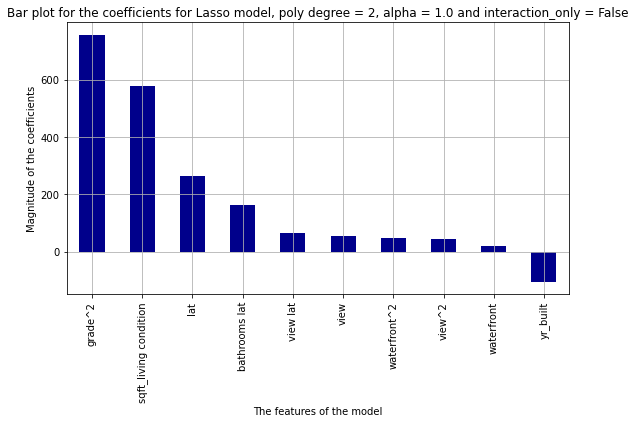

In [53]:
df_importances = pd.DataFrame(zip(grid1.best_estimator_.named_steps["poly"].get_feature_names(input_features = X.columns),
                 grid1.best_estimator_.named_steps["model"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.set_index(0, inplace = True)

plt.figure(figsize = (9,5))
df_importances[1].sort_values(ascending = False).plot(kind = 'bar', color = 'darkblue')
plt.title('Bar plot for the coefficients for Lasso model, poly degree = 2, alpha = 1.0 and interaction_only = False')
plt.ylabel('Magnitude of the coefficients')
plt.xlabel('The features of the model')
plt.grid()
plt.show()

We have 10 not not zero coefficients and we see that our r2 score didn't improve much. Some coefficients are confusing beacouse waterfront variable may be only 0 or 1 so it's hard to interpret influence of waterfront^2 so I suppose that the model with degree = 2 and intaction_only = True has higher interpretability.

   Lets analyze a model with  interaction_only = True and lower alpha:

In [54]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2, interaction_only = True)),
    ('scaler', MinMaxScaler()),
    ('model', Lasso(max_iter = 10000, alpha = 0.1))
])

pipe.fit(X, np.sqrt(y))
y_hat_pipe = pipe.predict(X)
#print('Best params:', grid1.best_params_)
#print(' ')
print('Score:', r2_score(y, y_hat_pipe**2))

Score: 0.7633218823914996


In [55]:
df_importances1 = pd.DataFrame(zip(pipe.named_steps["poly"].get_feature_names_out(input_features = X.columns),
                 pipe.named_steps["model"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances1 = df_importances1[df_importances1[1] != 0]
df_importances1.sort_values(by=1)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'waterfront', 4: 'view', 5: 'condition', 6: 'grade', 7: 'yr_built', 8: 'lat'}
 


,0,1
8,yr_built,-149.607176
14,bedrooms condition,-89.776365
31,waterfront view,32.470600
36,view condition,87.878132
37,view grade,95.220551
33,waterfront grade,212.327546
9,lat,270.438849
22,bathrooms grade,409.097309
28,sqft_living grade,458.917517
44,grade lat,501.084078


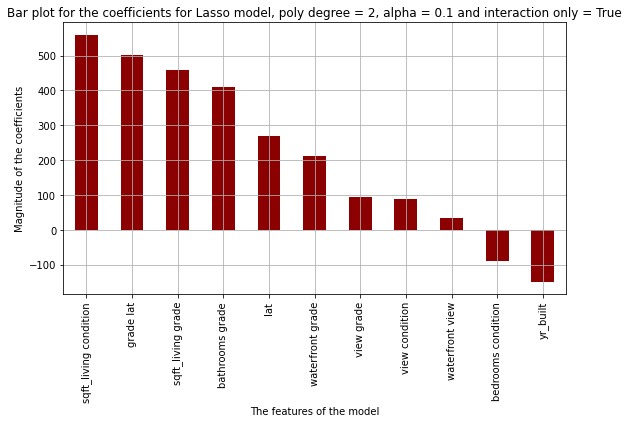

In [56]:
df_importances1.set_index(0, inplace = True)
plt.figure(figsize = (9,5))
df_importances1[1].sort_values(ascending = False).plot(kind = 'bar', color = 'darkred')
plt.title('Bar plot for the coefficients for Lasso model, poly degree = 2, alpha = 0.1 and interaction only = True')
plt.ylabel('Magnitude of the coefficients')
plt.xlabel('The features of the model')
plt.grid()
plt.show()

### 6. Conclusions:

#### 1. Correlation analysis:   

Correlation analysis showed us that we have only 1 variable having strong positive correlation with the target variable (sqft_living). It seems very reasonable that overall house living square has the highest influence on house price.
Several variables have middle positive correlation with house price. They are 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'. Middle correlation should be between 0.3 and 0.7.   
I developed several ML models to see the influence of every variable on house price and to understand their impact.   
Lets compare these results with analysis of correlation between variables.

#### 2. Linear regression and RFE   
LR model gives us several interesting insights. Firstly we see that variable 'year_built' (year then house was built) has negative impact on house pricing (we may conclude that some houses built very long time ago can be considered as historical ones and their prices are higher in this case). Quantity of bedrooms has also negative impact on price in simple Linear model (For the begining it looks little bit confusing but this parameter is correlated with sqft_living which should be correlated with quantity bathrooms. The biiger the living square than the bigger the quantity of bedrooms and bathrooms  in the house but the 'bathrooms' parameter has more impact on house pricing due to bigger cost of every bathroom then every bedroom (in correlation analysis we see higher impact of the 'bathrooms' in comparison with the 'bedrooms'as well. This fact proves my statement about higher bathrooms cost)).   
Variables with strong positive impact are: 'grade', 'sqft_above', 'sqft_living', 'lat', 'bathrooms'. The parameter 'sqft_living15' was removed before modelling. We may see that these 5 parameters also have strong or middle positive correlation with our price variable so we may conclude that the results of interpretation of the LinR model and the correlation analysis are similar but with some difference concerning the 'bedrooms' and the 'year_built' parameters which have negative effect. But in reality it seems strange that quantity of bedrooms in house may have negative effect on price in mathematical model. To check this fact it is necessary to perform additional analysis with different model.  
RFE:
Firstly RFE showed us that we have 2 variables which have very strong influence on the tagret but doesn't improve the model perfomance ('sqft_above', sqft_basement') due to strong correlation with 'sqft_living'. We can exclude these 2 variables from the further analysis.   
Secondly RFE showed that it is possible to exclude 6 variables with minor effect. They are: 3	sqft_lot, floors, yr_renovated, long, month, day_of_month. In our correlation analysis all these variables have little impact (less then 0.3) and it means that the influence of these variables on the target variable is weak so I decided not to use them in the further analysis.

#### 3. Lasso analysis   
For further Lasso analysis I have 10 variables (9 features) which is very good for model interpretation task.   
In my interpretation analysis I have 3 models and all of them have the second poly degree with different hyperparameters.   
Firstly all the models give us negative coeficient for the 'year_built' variable. It means that old houses have higher prices. 
The first model has regularization coefficient alpha = 1.0 and interaction_only = True. The last parameter allows us to estimate cooperation between fetures without separate poly degree for them.

Parameters with the strongest impact are:   
cooperation between 'grade' and 'lat' that means that overall estimation of house facilities with house special location gives us high price results for the house. In some districts houses have higher prices as well as houses with high grade in these expensive districts cost higher than ordinary houses.   
The second strongest combination of the parameters is: 'sqft_living' and 'condition'. Sqft_living has the highest impact on the price (see LinR analysis) and it has even higher impact in coopertaion with 'condition' parameter.    
Big houses in districts with good condition cost higher than small houses in districts with poor facilities. We see that Lasso model reflects real-life dependences.   
The strongest single parameter here is 'lat'. It means that house location has high impact on its pricing. It is often truly for the majority of the cities. Our pairplot shows that the houses located in the north part of King county have higher prices.    Combination between 'bathrooms' and 'grade' doesn't seem to be very logical but we should understand that these parameters are strong when they are single and they also may have high weight for the model when they are combined.   
The rest parameters have lower coefficients. They are: view, waterfront, view with lat and sqft_living with lat. In our case waterfront parameter is interesting and we see that this single feature has a little impact on pricing in our Lasso model. In previous assignment I proved that this parameter is impactful by hypothesis testing. Lasso model also shows us that this paramter is essential and influence house pricing.    

The second model has interaction_only = False. It has little bit higher r2 score but gives us less insightful results. Grade^2 is the strongest parameter here but it is hard to interpret this result. We understand that the higher the estimated grade, the better the house and the higher the price but the second degree of the grade parameter doesn't give us any additional insight. Other coefficients look similar to the first lasso model excluding grade-lat parameter which is absent in this model.   

The third model has lower alpha, weaker regularization and interaction_only hyperparameter = True: This model gives us little bit higher r2 score result and coefficients similar to the first Lasso model with minor difference.
The parameters having the strongest coefficients are: grade-lat, sqft_living-condition, bathrooms-grade, sqft_living-grade. The first 2 parameters are the strongest parameters of the first Lasso model and the third and the forth parameters of this model are combinations of other parameters which are strong in when they are single.   
Due to the fact that this model has r2 score which is very similar with the first Lasso model I suppose it would be better to use the first Lasso model for the model interpretation task for this dataset. This model has only 9 parameters showes us combination between features gives us high r2 score and it's very easy to interpret such simple model.

### 4. Final conclusions
All models show us that old houses have higher prices.   
The most influential single parameters are: 'grade', 'sqft_living', 'lat', 'bathrooms', 'waterfront'.
The most influential combined parameters are: 'grade-lat', 'sqft_living-condition', 'bathrooms-grade'.
The best hyperparameters for the model interpretation task are: poly degree = 2, alpha = 1.0 and interaction_only = True.